In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset

In [2]:


sample = pd.read_csv(
    "/content/ACI-IoT-2023-dataset.csv",
    nrows=10000,
    low_memory=False
)

sample.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 85 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Flow_ID                     10000 non-null  object 
 1   Src_IP                      10000 non-null  object 
 2   Src_Port                    10000 non-null  int64  
 3   Dst_IP                      10000 non-null  object 
 4   Dst_Port                    10000 non-null  int64  
 5   Protocol                    10000 non-null  int64  
 6   Timestamp                   10000 non-null  object 
 7   Flow_Duration               10000 non-null  int64  
 8   Total_Fwd_Packet            10000 non-null  int64  
 9   Total_Bwd_packets           10000 non-null  int64  
 10  Total_Length_of_Fwd_Packet  10000 non-null  float64
 11  Total_Length_of_Bwd_Packet  10000 non-null  float64
 12  Fwd_Packet_Length_Max       10000 non-null  float64
 13  Fwd_Packet_Length_Min       1000

# Exploratory Data Analysis

In [3]:
# This dataset has 1M+ rows and 80+ columns. Loading it with
# default pandas dtypes (float64, int64, object) would consume
# a very large amount of RAM (~1.5–2.0 GB).
#
# To safely load the full dataset into memory, we manually define
# optimal data types for each column:
#
# 1. Categorical columns:
#    - Columns such as Flow_ID, IP addresses, Timestamp, Label,
#      and Connection_Type are stored as pandas "category".
#      This drastically reduces memory usage because repeated
#      strings are stored only once internally.
#
# 2. Numeric columns:
#    - float64  → float32  (cuts memory in half for all float columns)
#    - int64    → int32    (cuts memory in half for integer columns)
#
#    These smaller dtypes are sufficient for machine learning,
#    and greatly reduce RAM usage without losing meaningful precision.
#
# The resulting dtype_map allows pandas to load the entire
# multi-million-row CSV efficiently and prevents memory errors.

In [4]:
dtype_map = {
    # object → category
    "Flow_ID": "category",
    "Src_IP": "category",
    "Dst_IP": "category",
    "Timestamp": "category",
    "Label": "category",
    "Connection_Type": "category",
}

# int64 → int32, float64 → float32
float_cols = [
    'Total_Length_of_Fwd_Packet', 'Total_Length_of_Bwd_Packet',
    'Fwd_Packet_Length_Max', 'Fwd_Packet_Length_Min', 'Fwd_Packet_Length_Mean',
    'Fwd_Packet_Length_Std', 'Bwd_Packet_Length_Max', 'Bwd_Packet_Length_Min',
    'Bwd_Packet_Length_Mean', 'Bwd_Packet_Length_Std', 'Flow_Byts/s',
    'Flow_Pkts/s', 'Flow_IAT_Mean', 'Flow_IAT_Std', 'Flow_IAT_Max',
    'Flow_IAT_Min', 'Fwd_IAT_Total', 'Fwd_IAT_Mean', 'Fwd_IAT_Std',
    'Fwd_IAT_Max', 'Fwd_IAT_Min', 'Bwd_IAT_Total', 'Bwd_IAT_Mean',
    'Bwd_IAT_Std', 'Bwd_IAT_Max', 'Bwd_IAT_Min', 'Fwd_Packets/s',
    'Bwd_Packets/s', 'Packet_Length_Min', 'Packet_Length_Max',
    'Packet_Length_Mean', 'Packet_Length_Std', 'Packet_Length_Variance',
    'Down/Up_Ratio', 'Average_Packet_Size', 'Fwd_Segment_Size_Avg',
    'Bwd_Segment_Size_Avg', 'Active_Mean', 'Active_Std', 'Active_Max',
    'Active_Min', 'Idle_Mean', 'Idle_Std', 'Idle_Max', 'Idle_Min'
]

int_cols = [
    'Src_Port','Dst_Port','Protocol','Flow_Duration','Total_Fwd_Packet',
    'Total_Bwd_packets','Fwd_PSH_Flags','Bwd_PSH_Flags','Fwd_URG_Flags','Bwd_URG_Flags',
    'Fwd_Header_Length','Bwd_Header_Length','FIN_Flag_Count','SYN_Flag_Count',
    'RST_Flag_Count','PSH_Flag_Count','ACK_Flag_Count','URG_Flag_Count','CWR_Flag_Count',
    'ECE_Flag_Count','Fwd_Bytes/Bulk_Avg','Fwd_Packet/Bulk_Avg','Fwd_Bulk_Rate_Avg',
    'Bwd_Bytes/Bulk_Avg','Bwd_Packet/Bulk_Avg','Bwd_Bulk_Rate_Avg',
    'Subflow_Fwd_Packets','Subflow_Fwd_Bytes','Subflow_Bwd_Packets',
    'Subflow_Bwd_Bytes','FWD_Init_Win_Bytes','Bwd_Init_Win_Bytes',
    'Fwd_Act_Data_Pkts','Fwd_Seg_Size_Min'
]

for col in float_cols:
    dtype_map[col] = "float32"

for col in int_cols:
    dtype_map[col] = "int32"


In [5]:
df = pd.read_csv(
    "/content/ACI-IoT-2023-dataset.csv",
    dtype=dtype_map,
    low_memory=False
)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1231411 entries, 0 to 1231410
Data columns (total 85 columns):
 #   Column                      Non-Null Count    Dtype   
---  ------                      --------------    -----   
 0   Flow_ID                     1231411 non-null  category
 1   Src_IP                      1231411 non-null  category
 2   Src_Port                    1231411 non-null  int32   
 3   Dst_IP                      1231411 non-null  category
 4   Dst_Port                    1231411 non-null  int32   
 5   Protocol                    1231411 non-null  int32   
 6   Timestamp                   1231411 non-null  category
 7   Flow_Duration               1231411 non-null  int32   
 8   Total_Fwd_Packet            1231411 non-null  int32   
 9   Total_Bwd_packets           1231411 non-null  int32   
 10  Total_Length_of_Fwd_Packet  1231411 non-null  float32 
 11  Total_Length_of_Bwd_Packet  1231411 non-null  float32 
 12  Fwd_Packet_Length_Max       1231411 non-nu

In [6]:
df. describe()

,Src_Port,Dst_Port,Protocol,Flow_Duration,Total_Fwd_Packet,Total_Bwd_packets,Total_Length_of_Fwd_Packet,Total_Length_of_Bwd_Packet,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,...,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
count,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,...,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06
mean,3.680030e+04,1.540297e+04,6.433792e+00,5.236489e+06,5.456022e+00,5.439780e+00,4.998454e+03,2.078230e+04,1.060881e+02,1.164441e+01,...,1.863420e+00,1.819248e+01,1.102516e+05,3.884923e+04,1.499667e+05,7.955380e+04,1.511453e+15,2.308548e+14,1.698769e+15,1.354338e+15
std,2.331748e+04,2.044498e+04,4.919235e+00,1.188271e+07,1.819997e+02,2.185122e+02,4.582666e+05,1.237657e+06,8.301655e+02,4.858325e+01,...,7.790255e+01,1.141942e+01,1.084820e+06,4.844928e+05,1.361146e+06,9.576543e+05,3.807742e+14,4.664642e+14,8.011705e+12,6.812539e+14
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.415706e+14,0.000000e+00,1.698671e+15,5.000001e+06
25%,5.353000e+03,5.300000e+01,6.000000e+00,3.357000e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.698672e+15,0.000000e+00,1.698683e+15,1.698672e+15
50%,4.814600e+04,3.017000e+03,6.000000e+00,6.631000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.698683e+15,0.000000e+00,1.698690e+15,1.698683e+15
75%,5.529500e+04,3.096650e+04,6.000000e+00,3.117183e+06,2.000000e+00,1.000000e+00,2.400000e+01,0.000000e+00,1.100000e+01,2.000000e+00,...,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.698766e+15,0.000000e+00,1.698847e+15,1.698766e+15
max,6.553500e+04,6.553500e+04,1.700000e+01,6.094632e+07,7.418000e+04,7.247000e+04,2.382375e+08,2.646032e+08,3.830400e+04,1.553300e+04,...,2.885900e+04,4.400000e+01,5.406848e+07,3.246857e+07,5.406848e+07,5.406848e+07,1.699038e+15,1.201401e+15,1.699038e+15,1.699038e+15


In [7]:
print(df.shape)

(1231411, 85)


In [8]:
# Show dataset shape, data types, and total memory usage
print("Shape:", df.shape)
print("\nDtypes:\n", df.dtypes)
print("\nMemory usage (MB):")
print(df.memory_usage(deep=True).sum() / (1024**2))


Shape: (1231411, 85)

Dtypes:
 Flow_ID            category
Src_IP             category
Src_Port              int32
Dst_IP             category
Dst_Port              int32
                     ...   
Idle_Std            float32
Idle_Max            float32
Idle_Min            float32
Label              category
Connection_Type    category
Length: 85, dtype: object

Memory usage (MB):
523.0710792541504


# Data Preprocessing

Check for missing values

In [9]:
# Count missing values in each column (sorted)
missing = df.isna().sum().sort_values(ascending=False)
print(missing[missing > 0])


Flow_Byts/s    1009
dtype: int64


In [10]:
# drop flow bytes because there is no new information I can get from it
# It can create problems
df.drop('Flow_Byts/s', axis=1, inplace=True)


In [11]:
missing = df.isna().sum().sort_values(ascending=False)
print(missing[missing > 0])


Series([], dtype: int64)


No missing values

Remove Unecessary features

In [12]:
df = df.drop(["Flow_ID", "Src_IP", "Dst_IP", "Timestamp"], axis=1)
df

,Src_Port,Dst_Port,Protocol,Flow_Duration,Total_Fwd_Packet,Total_Bwd_packets,Total_Length_of_Fwd_Packet,Total_Length_of_Bwd_Packet,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,...,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Connection_Type
0,33344,443,6,379933,11,11,720.0,6169.0,517.0,0.0,...,0.00,0.0,0.0,0.0,1.698846e+15,0.000000e+00,1.698846e+15,1.698846e+15,Benign,wired
1,36754,80,6,205637,3,3,87.0,189.0,87.0,0.0,...,0.00,0.0,0.0,0.0,1.698846e+15,0.000000e+00,1.698846e+15,1.698846e+15,Benign,wired
2,36754,80,6,0,2,0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,1.698846e+15,0.000000e+00,1.698846e+15,1.698846e+15,Benign,wired
3,8080,40426,6,5030379,1,2,6.0,0.0,6.0,6.0,...,0.00,0.0,0.0,0.0,8.494231e+14,1.201266e+15,1.698846e+15,5.030379e+06,Benign,wired
4,40054,80,6,72278,3,4,87.0,148.0,87.0,0.0,...,0.00,0.0,0.0,0.0,1.698846e+15,0.000000e+00,1.698846e+15,1.698846e+15,Benign,wired
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1231406,58126,443,6,1,2,0,12.0,0.0,6.0,6.0,...,0.00,0.0,0.0,0.0,1.698946e+15,0.000000e+00,1.698946e+15,1.698946e+15,Benign,wired
1231407,30001,47579,6,50077229,4,2,140.0,390.0,70.0,0.0,...,77082.00,0.0,77082.0,77082.0,8.494731e+14,1.201336e+15,1.698946e+15,4.992308e+07,Benign,wired
1231408,0,0,0,46365348,15,0,0.0,0.0,0.0,0.0,...,3713165.75,3789721.5,8045778.0,1014561.0,4.247365e+14,8.494730e+14,1.698946e+15,6.831749e+06,Benign,wired
1231409,52046,443,6,146262,15,37,20340.0,14242.0,9327.0,0.0,...,0.00,0.0,0.0,0.0,1.698946e+15,0.000000e+00,1.698946e+15,1.698946e+15,Benign,wired


In [13]:
# Show all distinct labels in the dataset
df['Label'].unique()


['Benign', 'ICMP Flood', 'Slowloris', 'SYN Flood', 'UDP Flood', ..., 'OS Scan', 'Port Scan', 'Ping Sweep', 'Vulnerability Scan', 'ARP Spoofing']
Length: 12
Categories (12, object): ['ARP Spoofing', 'Benign', 'DNS Flood', 'Dictionary Attack', ..., 'SYN Flood',
                          'Slowloris', 'UDP Flood', 'Vulnerability Scan']

In [14]:
# Count how many rows belong to each label
df['Label'].value_counts()


,count
Label,
Port Scan,441282
Benign,329295
ICMP Flood,225234
Ping Sweep,71928
DNS Flood,46935
Vulnerability Scan,39537
OS Scan,37524
Slowloris,18643
SYN Flood,13857


In [15]:
# Since I have 12 different attack types I will be changin them into binary classification
# benign and attack

In [16]:
# Convert all non-benign rows to attack = 1
df["BinaryLabel"] = (df["Label"] != "Benign").astype(int)
df

,Src_Port,Dst_Port,Protocol,Flow_Duration,Total_Fwd_Packet,Total_Bwd_packets,Total_Length_of_Fwd_Packet,Total_Length_of_Bwd_Packet,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Connection_Type,BinaryLabel
0,33344,443,6,379933,11,11,720.0,6169.0,517.0,0.0,...,0.0,0.0,0.0,1.698846e+15,0.000000e+00,1.698846e+15,1.698846e+15,Benign,wired,0
1,36754,80,6,205637,3,3,87.0,189.0,87.0,0.0,...,0.0,0.0,0.0,1.698846e+15,0.000000e+00,1.698846e+15,1.698846e+15,Benign,wired,0
2,36754,80,6,0,2,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.698846e+15,0.000000e+00,1.698846e+15,1.698846e+15,Benign,wired,0
3,8080,40426,6,5030379,1,2,6.0,0.0,6.0,6.0,...,0.0,0.0,0.0,8.494231e+14,1.201266e+15,1.698846e+15,5.030379e+06,Benign,wired,0
4,40054,80,6,72278,3,4,87.0,148.0,87.0,0.0,...,0.0,0.0,0.0,1.698846e+15,0.000000e+00,1.698846e+15,1.698846e+15,Benign,wired,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1231406,58126,443,6,1,2,0,12.0,0.0,6.0,6.0,...,0.0,0.0,0.0,1.698946e+15,0.000000e+00,1.698946e+15,1.698946e+15,Benign,wired,0
1231407,30001,47579,6,50077229,4,2,140.0,390.0,70.0,0.0,...,0.0,77082.0,77082.0,8.494731e+14,1.201336e+15,1.698946e+15,4.992308e+07,Benign,wired,0
1231408,0,0,0,46365348,15,0,0.0,0.0,0.0,0.0,...,3789721.5,8045778.0,1014561.0,4.247365e+14,8.494730e+14,1.698946e+15,6.831749e+06,Benign,wired,0
1231409,52046,443,6,146262,15,37,20340.0,14242.0,9327.0,0.0,...,0.0,0.0,0.0,1.698946e+15,0.000000e+00,1.698946e+15,1.698946e+15,Benign,wired,0


In [17]:
# this original label column still contain the 12 attack types
# We only need it to build Binary Label
# After that step, label becomes useles and dangerous
# so I need to remove it
df.drop("Label", axis=1, inplace=True)


In [18]:
# Convert multi-class labels into binary intrusion detection (Benign=0, Attack=1)
df["BinaryLabel"].value_counts()

,count
BinaryLabel,
1,902116
0,329295


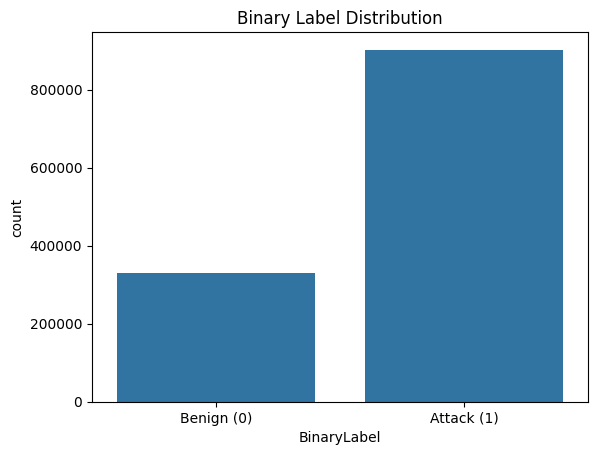

In [19]:
sns.countplot(data=df, x="BinaryLabel")
plt.title("Binary Label Distribution")
plt.xticks([0,1], ["Benign (0)", "Attack (1)"])
plt.show()

In [20]:
# Check how many +inf / -inf values exist in each numeric column
num_cols = df.select_dtypes(include=["float32", "float64", "int32", "int64"]).columns
inf_counts = np.isinf(df[num_cols]).sum().sort_values(ascending=False)
print(inf_counts[inf_counts > 0])

Flow_Pkts/s    1924
dtype: int64


In [21]:
# Select all numeric columns
num_cols = df.select_dtypes(include=["float32", "float64", "int32", "int64"]).columns

# Replace +inf and -inf with NaN
df[num_cols] = df[num_cols].replace([np.inf, -np.inf], np.nan)

# Fill NaN with 0
df[num_cols] = df[num_cols].fillna(0)

# Sanity checks
print("Remaining NaNs:", df.isna().sum().sum())
print("Remaining infinities:", np.isinf(df[num_cols]).sum().sum())

Remaining NaNs: 0
Remaining infinities: 0


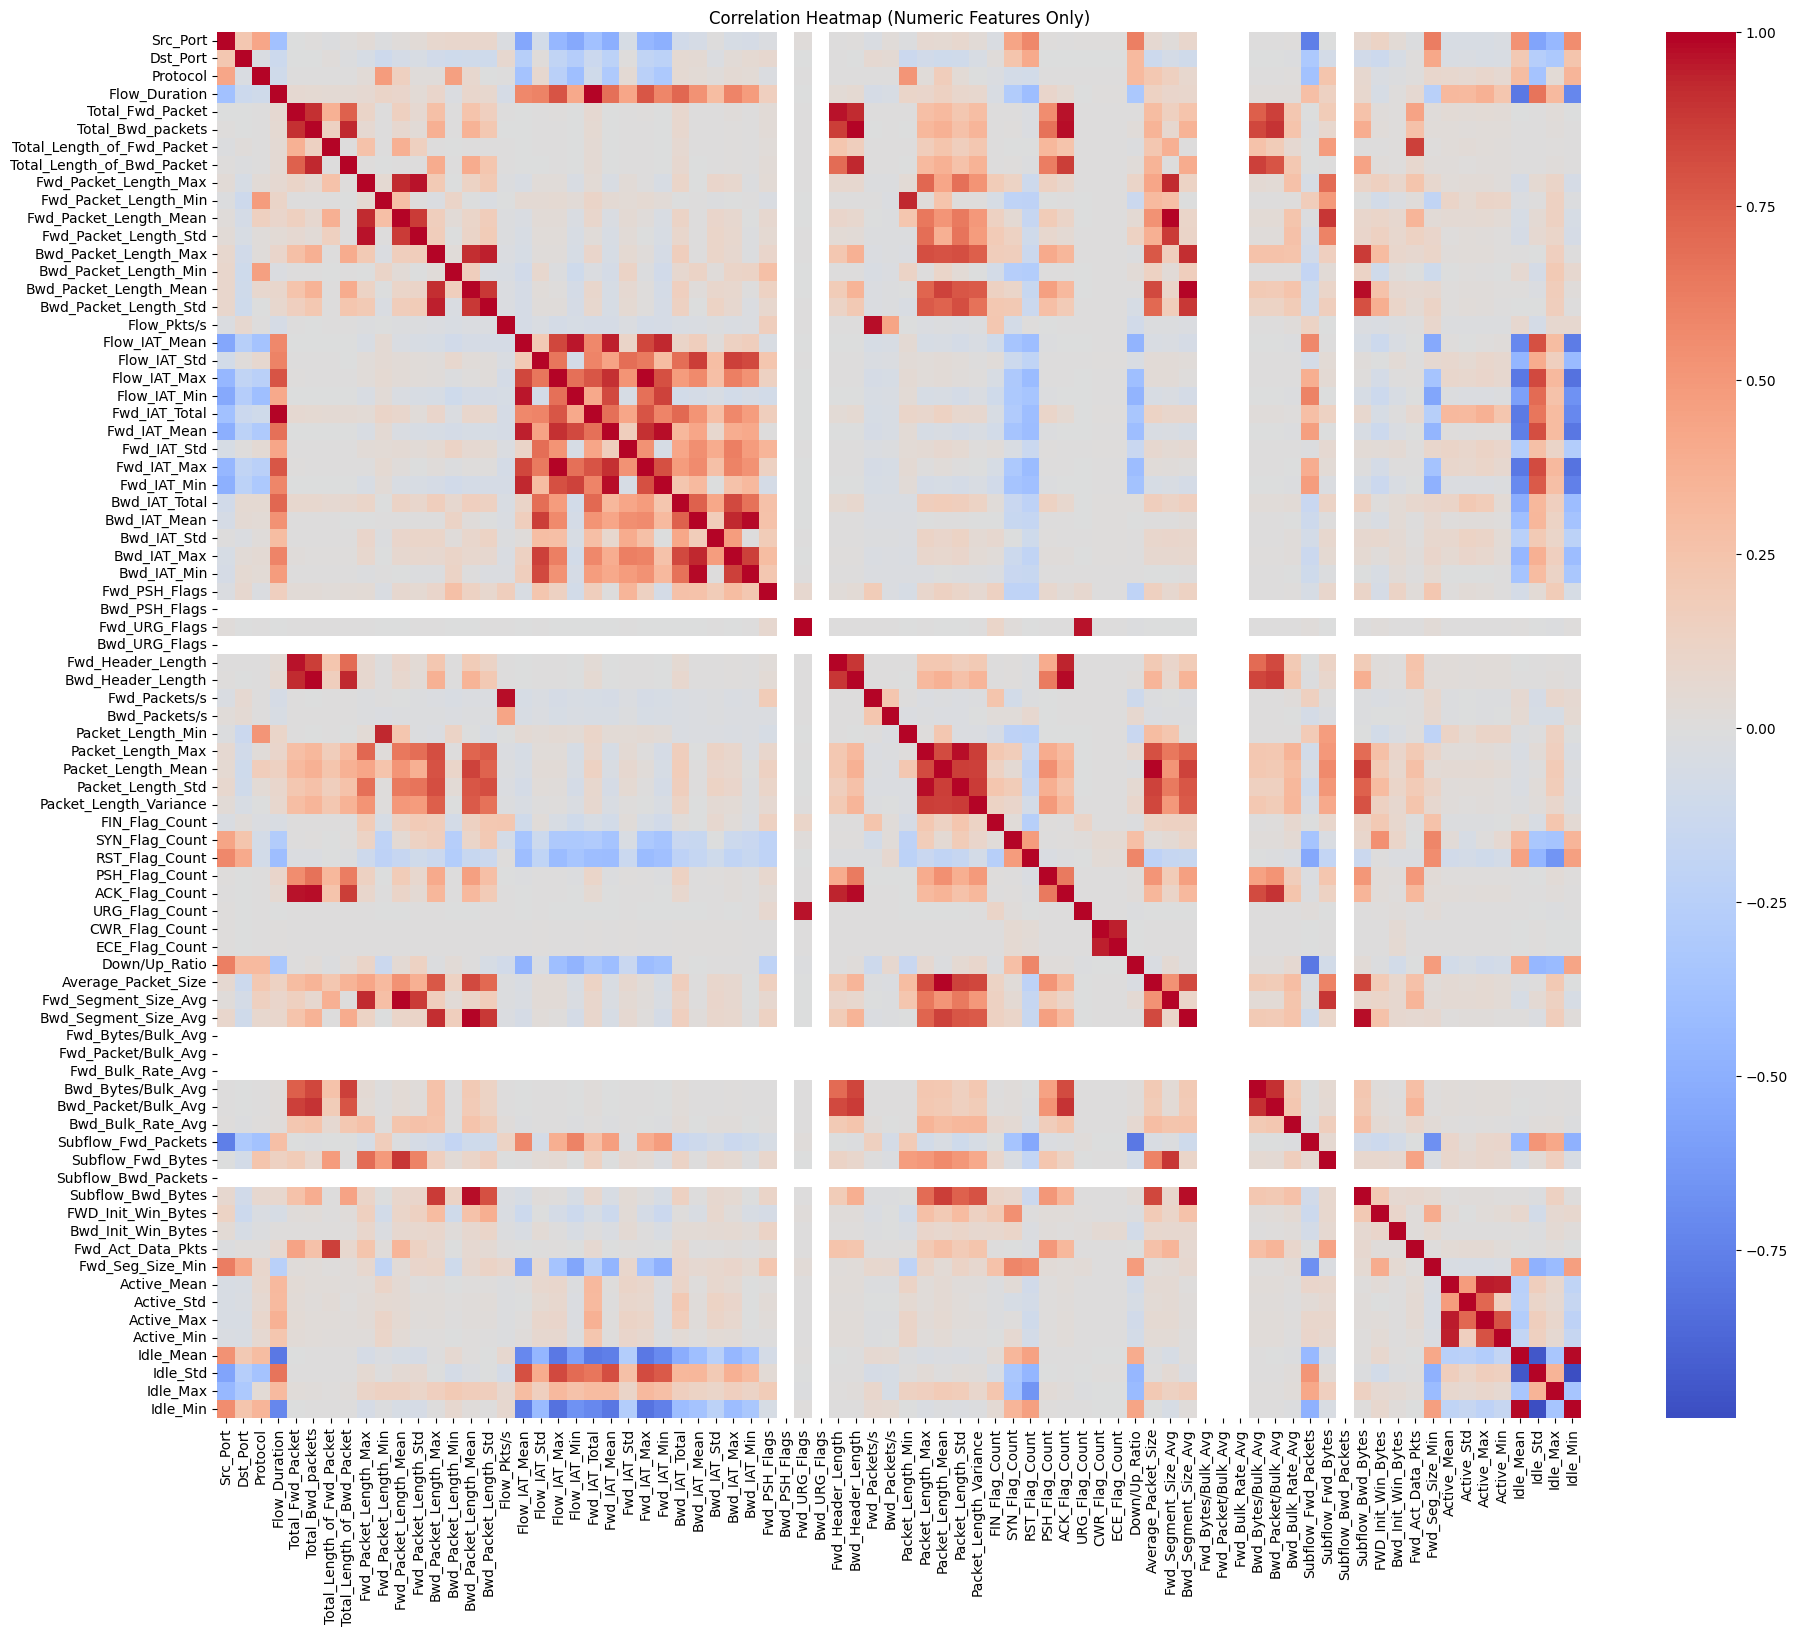

In [22]:
# Select only numeric features
numeric_df = df.select_dtypes(include=["float32", "int32"])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(22, 18))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

In [23]:
import numpy as np
import pandas as pd

# Compute correlation on numeric columns only
numeric_df = df.select_dtypes(include=['int32', 'float32'])

corr_matrix = numeric_df.corr().abs()

# Upper triangular matrix mask
upper_tri = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

# Identify columns with correlation > 0.95
high_corr_cols = [
    column for column in upper_tri.columns if any(upper_tri[column] > 0.95)
]

print("\n Highly correlated columns to drop:")
print(high_corr_cols)

# Drop them
df = df.drop(columns=high_corr_cols)
print(f"\nRemaining columns: {df.shape[1]}")



 Highly correlated columns to drop:
['Fwd_Packet_Length_Std', 'Flow_IAT_Min', 'Fwd_IAT_Total', 'Fwd_IAT_Max', 'Fwd_IAT_Min', 'Bwd_IAT_Min', 'Fwd_Header_Length', 'Bwd_Header_Length', 'Fwd_Packets/s', 'Packet_Length_Std', 'ACK_Flag_Count', 'URG_Flag_Count', 'Average_Packet_Size', 'Fwd_Segment_Size_Avg', 'Bwd_Segment_Size_Avg', 'Subflow_Bwd_Bytes', 'Idle_Min']

Remaining columns: 63


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1231411 entries, 0 to 1231410
Data columns (total 63 columns):
 #   Column                      Non-Null Count    Dtype   
---  ------                      --------------    -----   
 0   Src_Port                    1231411 non-null  int32   
 1   Dst_Port                    1231411 non-null  int32   
 2   Protocol                    1231411 non-null  int32   
 3   Flow_Duration               1231411 non-null  int32   
 4   Total_Fwd_Packet            1231411 non-null  int32   
 5   Total_Bwd_packets           1231411 non-null  int32   
 6   Total_Length_of_Fwd_Packet  1231411 non-null  float32 
 7   Total_Length_of_Bwd_Packet  1231411 non-null  float32 
 8   Fwd_Packet_Length_Max       1231411 non-null  float32 
 9   Fwd_Packet_Length_Min       1231411 non-null  float32 
 10  Fwd_Packet_Length_Mean      1231411 non-null  float32 
 11  Bwd_Packet_Length_Max       1231411 non-null  float32 
 12  Bwd_Packet_Length_Min       1231411 non-nu

# Model Training

In [25]:
# Clean and encode Connection_Type: wired=0, wireless=1
df["Connection_Type"] = df["Connection_Type"].astype(str).str.strip().str.lower()
print(df["Connection_Type"].value_counts(dropna=False))  # just to inspect

# Keep only valid values and map to integers
df = df[df["Connection_Type"].isin(["wired", "wireless"])]
df["Connection_Type"] = df["Connection_Type"].map({"wired": 0, "wireless": 1})
print(df["Connection_Type"].value_counts(dropna=False))  # just to inspect


Connection_Type
wireless    742758
wired       488653
Name: count, dtype: int64
Connection_Type
1    742758
0    488653
Name: count, dtype: int64


In [26]:
# Split dataset into features (X) and target (y)
X = df.drop("BinaryLabel", axis=1)
y = df["BinaryLabel"]


Class imbalance handling

Since this dataset has a lot of features chunking will be applied

In [27]:
# to avoid chunks being ordered by time or attack type
# Shuffle full cleaned df
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)


In [28]:
n_chunks = 5   # Change to any number you want (4, 6, 10, etc.)
chunks = np.array_split(df_shuffled, n_chunks)


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [29]:
# Inspeact each chunk and label balance
for i, chunk in enumerate(chunks, start=1):
    print(f"Chunk {i}: shape = {chunk.shape}")
    print(chunk["BinaryLabel"].value_counts(normalize=True))
    print("-" * 40)


Chunk 1: shape = (246283, 63)
BinaryLabel
1    0.732901
0    0.267099
Name: proportion, dtype: float64
----------------------------------------
Chunk 2: shape = (246282, 63)
BinaryLabel
1    0.732624
0    0.267376
Name: proportion, dtype: float64
----------------------------------------
Chunk 3: shape = (246282, 63)
BinaryLabel
1    0.733432
0    0.266568
Name: proportion, dtype: float64
----------------------------------------
Chunk 4: shape = (246282, 63)
BinaryLabel
1    0.732323
0    0.267677
Name: proportion, dtype: float64
----------------------------------------
Chunk 5: shape = (246282, 63)
BinaryLabel
1    0.731657
0    0.268343
Name: proportion, dtype: float64
----------------------------------------


In [30]:
df_chunk1 = chunks[0]   # You can choose 1, 2, 3, etc.


Train test Split 80:20

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

X = df_chunk1.drop("BinaryLabel", axis=1)
y = df_chunk1["BinaryLabel"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [32]:
from sklearn.utils.class_weight import compute_class_weight

# Compute class weights for BinaryLabel = {0, 1}
classes = np.unique(y_train)
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=classes,
    y=y_train
)
class_weight_dict = dict(zip(classes, class_weights))
print("Class weights:", class_weight_dict)

Class weights: {np.int64(0): np.float64(1.871980997624703), np.int64(1): np.float64(0.6822182671865153)}


In [33]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


MLP Model

In [58]:
import tensorflow as tf
from tensorflow.keras import layers

# For reproducibility (optional)
tf.random.set_seed(42)

n_features = X_train_scaled.shape[1]
print("Number of input features:", n_features)

model = tf.keras.Sequential([
    layers.Input(shape=(n_features,)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),

    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),

    layers.Dense(32, activation='relu'),

    # Binary output: Attack (1) / Benign (0)
    layers.Dense(1, activation='sigmoid')
])

model.summary()


Number of input features: 62


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │         8,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,433 (72.00 KB)

 Trainable params: 18,433 (72.00 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)


In [36]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=20,              # you can increase/decrease this
    restore_best_weights=True
)


In [37]:
history = model.fit(
    X_train_scaled,
    y_train,
    epochs=100,
    batch_size=512,           # a bit larger for this kind of data
    validation_split=0.2,     # from the training set
    callbacks=[early_stop],
    class_weight=class_weight_dict,
    verbose=1
)


Epoch 1/100
308/308 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7214 - auc: 0.6688 - loss: 1414861553664.0000 - precision: 0.8728 - recall: 0.7256 - val_accuracy: 0.8230 - val_auc: 0.7015 - val_loss: 889646400.0000 - val_precision: 0.8664 - val_recall: 0.8961
Epoch 2/100
308/308 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7812 - auc: 0.7214 - loss: 12243078144.0000 - precision: 0.8662 - recall: 0.8305 - val_accuracy: 0.8241 - val_auc: 0.8689 - val_loss: 60.1135 - val_precision: 0.8440 - val_recall: 0.9318
Epoch 3/100
308/308 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7814 - auc: 0.7815 - loss: 2224747008.0000 - precision: 0.8634 - recall: 0.8360 - val_accuracy: 0.7276 - val_auc: 0.8532 - val_loss: 2.4588 - val_precision: 0.9667 - val_recall: 0.6499
Epoch 4/100
308/308 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7491 - auc: 0.8244 - loss: 1279199872.0000 - precision: 0.9365 - recall: 0.7064 - val_accuracy: 0.7589 - val_auc: 0.8801 - val_loss: 1.6828 - val_precision: 0.9611 

Evaluate on the test set

In [38]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import numpy as np

# Predict probabilities and labels
y_pred_prob = model.predict(X_test_scaled).ravel()
y_pred = (y_pred_prob >= 0.5).astype(int)

print("Test AUC:", roc_auc_score(y_test, y_pred_prob))

print("\nClassification report:")
print(classification_report(y_test, y_pred, digits=4))

print("\nConfusion matrix:")
print(confusion_matrix(y_test, y_pred))


1540/1540 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Test AUC: 0.8748905367670263

Classification report:
              precision    recall  f1-score   support

           0     0.5356    0.9872    0.6945     13157
           1     0.9933    0.6881    0.8130     36100

    accuracy                         0.7680     49257
   macro avg     0.7645    0.8376    0.7537     49257
weighted avg     0.8710    0.7680    0.7813     49257


Confusion matrix:
[[12989   168]
 [11261 24839]]


Visualization

In [39]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score


# Predict probabilities and class labels
y_pred_prob = model.predict(X_test_scaled).ravel()       # probabilities for class 1
y_pred = (y_pred_prob >= 0.5).astype(int)

1540/1540 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


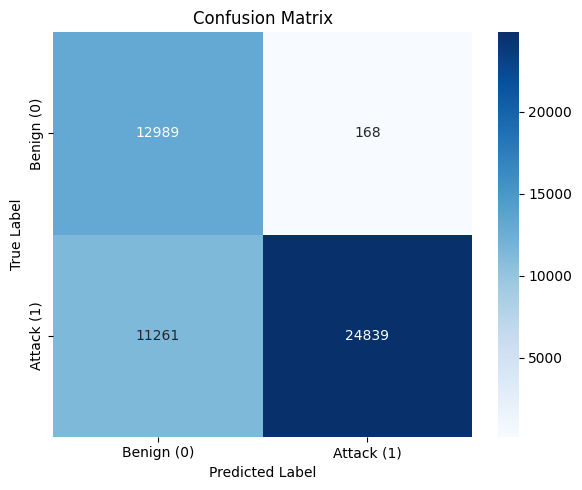

In [40]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = ["Benign (0)", "Attack (1)"]

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=labels,
    yticklabels=labels
)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


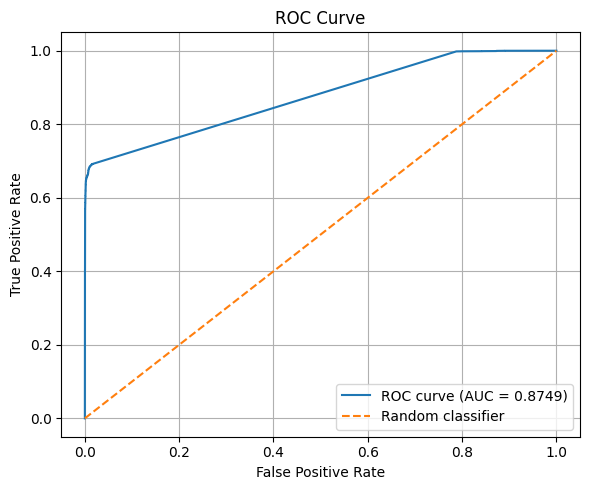

In [41]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


In [42]:

import time

# Change X_test_scaled into a NumPy array
X_test_np = np.asarray(X_test_scaled, dtype="float32")
n_samples = X_test_np.shape[0]
print("Test shape:", X_test_np.shape)

# to avoid measuring first-call overhead
_ = model.predict(X_test_np[:512], batch_size=512, verbose=0)

# Timed full-batch inference ----
batch_size = 512  # you can keep same as training or change if you want

start = time.perf_counter()
_ = model.predict(X_test_np, batch_size=batch_size, verbose=0)
end = time.perf_counter()

total_time = end - start
latency_per_sample = total_time / n_samples       # seconds per sample
throughput = n_samples / total_time               # samples per second

print(f"\n--- Runtime Metrics (MLP) ---")
print(f"Total inference time: {total_time:.4f} s")
print(f"Average latency: {latency_per_sample * 1000:.4f} ms/sample")
print(f"Throughput: {throughput:.2f} samples/second")
print(f"(Batch size during inference: {batch_size})")


Test shape: (49257, 62)

--- Runtime Metrics (MLP) ---
Total inference time: 0.2686 s
Average latency: 0.0055 ms/sample
Throughput: 183392.01 samples/second
(Batch size during inference: 512)


In [43]:
mlp_model = model

In [59]:

# Feature Importance for MLP

import numpy as np
from sklearn.metrics import roc_auc_score

# Keep a stable reference to your trained MLP
mlp_model = model
feature_names = X.columns

# Take a random subset of the test set to make it fast
sample_size = 500
rng = np.random.RandomState(42)

X_test_np = np.asarray(X_test_scaled, dtype="float32")
y_test_np = np.asarray(y_test)

if len(X_test_np) > sample_size:
    idx = rng.choice(len(X_test_np), size=sample_size, replace=False)
    X_test_small = X_test_np[idx]
    y_test_small = y_test_np[idx]
else:
    X_test_small = X_test_np
    y_test_small = y_test_np

print("Using subset for importance:", X_test_small.shape)

def permutation_importance_keras(model, X, y, n_repeats=2, random_state=42):
    """
    Manual permutation importance for a Keras binary classifier.
    Measures AUC drop when each feature is shuffled.
    """
    rng = np.random.RandomState(random_state)

    X = np.asarray(X, dtype="float32")
    y = np.asarray(y)

    # 1) Baseline AUC with unshuffled data
    y_pred_prob = model.predict(X, verbose=0).ravel()
    baseline_auc = roc_auc_score(y, y_pred_prob)

    n_features = X.shape[1]
    importances = np.zeros(n_features, dtype=float)

    # 2) For each feature, shuffle and recompute AUC
    for j in range(n_features):
        drops = []
        for _ in range(n_repeats):
            X_perm = X.copy()
            col = X_perm[:, j].copy()
            rng.shuffle(col)
            X_perm[:, j] = col

            y_perm_prob = model.predict(X_perm, verbose=0).ravel()
            auc_perm = roc_auc_score(y, y_perm_prob)
            drops.append(baseline_auc - auc_perm)

        importances[j] = np.mean(drops)

    return importances, baseline_auc

# 3) Run permutation importance on the MLP
mlp_importances, mlp_baseline_auc = permutation_importance_keras(
    mlp_model,
    X_test_small,
    y_test_small,
    n_repeats=2,
    random_state=42
)

# Show top 20 most important features
indices = np.argsort(mlp_importances)[::-1]

print(f"\nBaseline AUC on subset (MLP): {mlp_baseline_auc:.4f}")
print("\n--- Permutation Feature Importance (MLP, top 20) ---")
for idx in indices[:20]:
    print(f"{feature_names[idx]}: AUC drop = {mlp_importances[idx]:.5f}")


Using subset for importance: (500, 62)

Baseline AUC on subset (MLP): 0.3380

--- Permutation Feature Importance (MLP, top 20) ---
Packet_Length_Min: AUC drop = 0.00945
Bwd_Packet_Length_Min: AUC drop = 0.00832
Bwd_Packets/s: AUC drop = 0.00799
Flow_IAT_Mean: AUC drop = 0.00385
Src_Port: AUC drop = 0.00208
PSH_Flag_Count: AUC drop = 0.00182
Active_Std: AUC drop = 0.00133
Flow_Duration: AUC drop = 0.00132
Fwd_Packet_Length_Max: AUC drop = 0.00130
Total_Fwd_Packet: AUC drop = 0.00123
RST_Flag_Count: AUC drop = 0.00119
Down/Up_Ratio: AUC drop = 0.00105
Subflow_Fwd_Packets: AUC drop = 0.00072
Connection_Type: AUC drop = 0.00048
Fwd_Act_Data_Pkts: AUC drop = 0.00032
Fwd_Seg_Size_Min: AUC drop = 0.00027
CWR_Flag_Count: AUC drop = 0.00000
Fwd_Bytes/Bulk_Avg: AUC drop = 0.00000
Fwd_Packet/Bulk_Avg: AUC drop = 0.00000
Bwd_URG_Flags: AUC drop = 0.00000


model relies most heavily on idle-time features (Idle_Mean, Idle_Std), showing that attacks disrupt the normal active–idle rhythm of IoT devices.

It also depends strongly on backward-flow packet statistics (Bwd packet lengths and timings), reflecting how malicious traffic produces abnormal responses from devices. Packet-size patterns and inter-arrival-time irregularities further help the model detect unusual traffic behavior. Finally, the Protocol feature influences classification, since many attacks use different protocols than normal IoT communication.

---------

# LSTM Model

In [45]:
import numpy as np
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC, Precision, Recall
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    accuracy_score
)

In [60]:
# Make sure y is aligned and convert X to numpy

y_train_reset = y_train.reset_index(drop=True)
y_test_reset  = y_test.reset_index(drop=True)

X_train_np = np.asarray(X_train_scaled, dtype="float32")
X_test_np  = np.asarray(X_test_scaled, dtype="float32")

n_train, n_features = X_train_np.shape
n_test = X_test_np.shape[0]
print("Train shape (rows, features):", X_train_np.shape)
print("Test shape (rows, features):",  X_test_np.shape)

Train shape (rows, features): (197026, 62)
Test shape (rows, features): (49257, 62)


In [61]:

# Reshape for LSTM: sequence length = 1
# So each flow is a sequence of 1 timestep with n_features features.

X_train_lstm = X_train_np.reshape(n_train, 1, n_features)
X_test_lstm  = X_test_np.reshape(n_test, 1, n_features)

print("LSTM train shape:", X_train_lstm.shape)  # (n_train, 1, n_features)
print("LSTM test shape:",  X_test_lstm.shape)   # (n_test, 1, n_features)

LSTM train shape: (197026, 1, 62)
LSTM test shape: (49257, 1, 62)


In [62]:
#  Class weights on the ORIGINAL per-row labels
classes = np.unique(y_train_reset)
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=classes,
    y=y_train_reset
)
class_weight_dict = dict(zip(classes.astype(int), class_weights.astype(float)))
print("Row-level class weights:", class_weight_dict)

# clip crazy weights
for k in class_weight_dict:
    class_weight_dict[k] = min(class_weight_dict[k], 10.0)

Row-level class weights: {np.int64(0): np.float64(1.871980997624703), np.int64(1): np.float64(0.6822182671865153)}


In [63]:
#Define a SMALL, REGULARIZED LSTM (binary output)

tf.random.set_seed(42)

model = Sequential()
model.add(Input(shape=(1, n_features)))   # sequence length = 1

model.add(
    LSTM(
        16,
        return_sequences=False,
        dropout=0.4,
        recurrent_dropout=0.4,
        kernel_regularizer=l2(1e-3)
    )
)

model.add(Dense(8, activation="relu", kernel_regularizer=l2(1e-3)))
model.add(Dropout(0.4))

# Binary output: 1 neuron with sigmoid
model.add(Dense(1, activation="sigmoid"))

model.summary()

model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss="binary_crossentropy",
    metrics=[
        "accuracy",
        AUC(name="auc"),
        Precision(name="precision"),
        Recall(name="recall")
    ]
)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 16)             │         5,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,201 (20.32 KB)

 Trainable params: 5,201 (20.32 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
#  Anti-overfitting callbacks

early_stop = EarlyStopping(
    monitor="val_loss",
    patience=8,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.5,
    patience=4,
    min_lr=1e-5,
    verbose=1
)

In [51]:
# Train LSTM model

history_lstm = model.fit(
    X_train_lstm,
    y_train_reset.values,    # per-row labels
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    class_weight=class_weight_dict,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

Epoch 1/100
4926/4926 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - accuracy: 0.8136 - auc: 0.8697 - loss: 0.4782 - precision: 0.9235 - recall: 0.8139 - val_accuracy: 0.7583 - val_auc: 0.8986 - val_loss: 0.4118 - val_precision: 0.9740 - val_recall: 0.6880 - learning_rate: 0.0010
Epoch 2/100
4926/4926 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.8442 - auc: 0.9235 - loss: 0.3526 - precision: 0.9736 - recall: 0.8099 - val_accuracy: 0.7630 - val_auc: 0.9049 - val_loss: 0.4080 - val_precision: 0.9860 - val_recall: 0.6857 - learning_rate: 0.0010
Epoch 3/100
4926/4926 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.8416 - auc: 0.9230 - loss: 0.3516 - precision: 0.9769 - recall: 0.8034 - val_accuracy: 0.7627 - val_auc: 0.9021 - val_loss: 0.4015 - val_precision: 0.9872 - val_recall: 0.6845 - learning_rate: 0.0010
Epoch 4/100
4926/4926 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.8276 - auc: 0.9233 - loss: 0.3500 - precision: 0.9804 - recall: 0.7810 - val_accuracy: 0.7638 - val_auc: 0.9057 - val_lo

In [52]:
# Evaluate on TEST rows

y_prob_test = model.predict(X_test_lstm).ravel()     # probabilities
y_pred_test = (y_prob_test >= 0.5).astype(int)       # predictions (0/1)

print("Classification report on TEST rows:")
print(classification_report(y_test_reset.values, y_pred_test, digits=4))

print("Confusion matrix on TEST rows:")
print(confusion_matrix(y_test_reset.values, y_pred_test))

print("Test AUC:", roc_auc_score(y_test_reset.values, y_prob_test))
print("Test Accuracy:", accuracy_score(y_test_reset.values, y_pred_test))

1540/1540 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Classification report on TEST rows:
              precision    recall  f1-score   support

           0     0.7170    0.9602    0.8209     13157
           1     0.9834    0.8619    0.9186     36100

    accuracy                         0.8881     49257
   macro avg     0.8502    0.9110    0.8698     49257
weighted avg     0.9123    0.8881    0.8925     49257

Confusion matrix on TEST rows:
[[12633   524]
 [ 4987 31113]]
Test AUC: 0.9477544030888837
Test Accuracy: 0.888117424934527


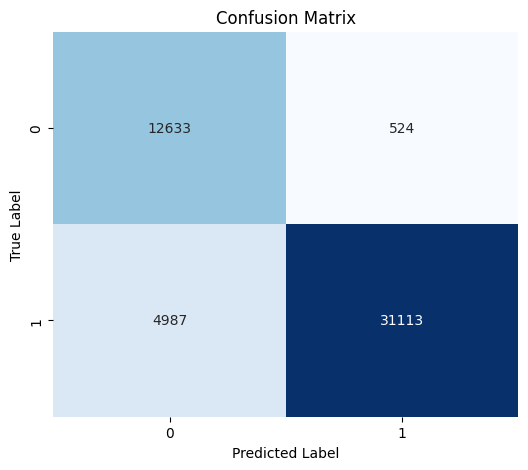

In [53]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

# CONFUSION MATRIX (VISUAL)

cm = confusion_matrix(y_test_reset.values, y_pred_test)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

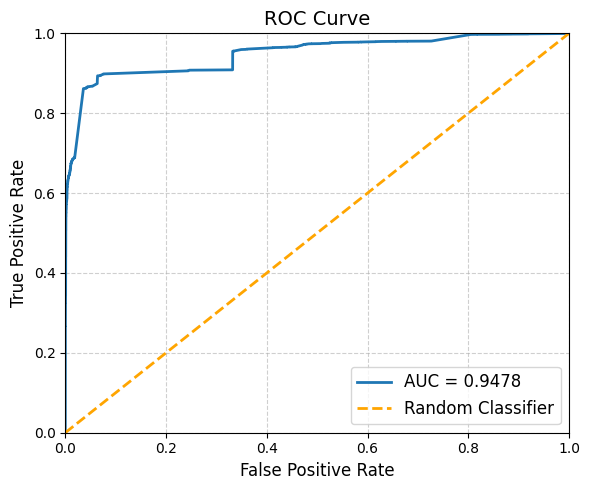

In [54]:
# Compute ROC and AUC
fpr, tpr, thresholds = roc_curve(y_test_reset.values, y_prob_test)
roc_auc = roc_auc_score(y_test_reset.values, y_prob_test)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, linewidth=2, label=f"AUC = {roc_auc:.4f}")

plt.plot([0, 1], [0, 1], linestyle="--", color="orange", linewidth=2, label="Random Classifier")

plt.title("ROC Curve", fontsize=14)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.legend(loc="lower right", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

In [55]:
# Make sure test data is a NumPy array
X_test_seq = np.asarray(X_test_lstm, dtype="float32")
n_sequences = X_test_seq.shape[0]
print("LSTM test shape:", X_test_seq.shape)  # (n_test, 1, n_features)

# Inference batch size (you can tweak this)
batch_size = 32

# Warm-up on a small batch to avoid first-call overhead
_ = model.predict(X_test_seq[:batch_size], batch_size=batch_size, verbose=0)

# Timed full-batch inference
start = time.perf_counter()
_ = model.predict(X_test_seq, batch_size=batch_size, verbose=0)
end = time.perf_counter()

total_time = end - start
latency_per_sample = total_time / n_sequences        # seconds per sequence/sample
throughput = n_sequences / total_time                # sequences/samples per second

print("\n--- Runtime Metrics (LSTM) ---")
print(f"Total inference time: {total_time:.4f} s")
print(f"Average latency: {latency_per_sample * 1000:.4f} ms/sample")
print(f"Throughput: {throughput:.2f} samples/second")
print(f"(Batch size during inference: {batch_size})")

LSTM test shape: (49257, 1, 62)

--- Runtime Metrics (LSTM) ---
Total inference time: 2.3150 s
Average latency: 0.0470 ms/sample
Throughput: 21276.89 samples/second
(Batch size during inference: 32)


In [56]:
# Permutation Feature Importance for LSTM

from sklearn.metrics import roc_auc_score
import numpy as np

# Use the same feature names as before (columns of X)
feature_names = X.columns

# 1) Take a random subset of the LSTM test set
sample_size = 500
rng = np.random.RandomState(42)

X_test_lstm_np = np.asarray(X_test_lstm, dtype="float32")   # (n_test, 1, n_features)
y_test_np = np.asarray(y_test_reset)

n_test, seq_len, n_features = X_test_lstm_np.shape
assert seq_len == 1, "This helper assumes sequence length = 1."

if n_test > sample_size:
    idx = rng.choice(n_test, size=sample_size, replace=False)
    X_test_lstm_small = X_test_lstm_np[idx]
    y_test_small = y_test_np[idx]
else:
    X_test_lstm_small = X_test_lstm_np
    y_test_small = y_test_np

print("Using subset for LSTM importance:", X_test_lstm_small.shape)

def permutation_importance_lstm(model, X_lstm, y, n_repeats=2, random_state=42):
    """
    Manual permutation importance for an LSTM with sequence length = 1.
    Measures AUC drop when each feature is shuffled.
    """
    rng = np.random.RandomState(random_state)

    X_lstm = np.asarray(X_lstm, dtype="float32")
    y = np.asarray(y)

    n_samples, seq_len, n_features = X_lstm.shape
    assert seq_len == 1, "Expected sequence length = 1."

    # Flatten to (n_samples, n_features) for shuffling
    X_flat = X_lstm.reshape(n_samples, n_features)

    # Baseline AUC
    y_pred_prob = model.predict(X_lstm, verbose=0).ravel()
    baseline_auc = roc_auc_score(y, y_pred_prob)

    importances = np.zeros(n_features, dtype=float)

    # For each feature, shuffle and recompute AUC
    for j in range(n_features):
        drops = []
        for _ in range(n_repeats):
            X_perm = X_flat.copy()
            col = X_perm[:, j].copy()
            rng.shuffle(col)
            X_perm[:, j] = col

            # Reshape back to (n_samples, 1, n_features)
            X_perm_lstm = X_perm.reshape(n_samples, 1, n_features)

            y_perm_prob = model.predict(X_perm_lstm, verbose=0).ravel()
            auc_perm = roc_auc_score(y, y_perm_prob)
            drops.append(baseline_auc - auc_perm)

        importances[j] = np.mean(drops)

    return importances, baseline_auc

# 2) Run permutation importance on the LSTM (fast)
lstm_importances, lstm_baseline_auc = permutation_importance_lstm(
    model,                  # your trained LSTM (variable is `model` here)
    X_test_lstm_small,
    y_test_small,
    n_repeats=2,
    random_state=42
)

# 3) Show top 20 most important features
indices = np.argsort(lstm_importances)[::-1]

print(f"\nBaseline AUC on subset (LSTM): {lstm_baseline_auc:.4f}")
print("\n--- Permutation Feature Importance (LSTM, top 20) ---")
for idx in indices[:20]:
    print(f"{feature_names[idx]}: AUC drop = {lstm_importances[idx]:.5f}")


Using subset for LSTM importance: (500, 1, 62)

Baseline AUC on subset (LSTM): 0.9473

--- Permutation Feature Importance (LSTM, top 20) ---
Flow_IAT_Std: AUC drop = 0.14259
Fwd_IAT_Std: AUC drop = 0.09233
Packet_Length_Variance: AUC drop = 0.07850
Bwd_Packet_Length_Max: AUC drop = 0.07656
Bwd_Packet_Length_Mean: AUC drop = 0.05903
Total_Length_of_Bwd_Packet: AUC drop = 0.05508
Packet_Length_Min: AUC drop = 0.05505
Bwd_Init_Win_Bytes: AUC drop = 0.05320
Bwd_Packet_Length_Min: AUC drop = 0.04947
Total_Length_of_Fwd_Packet: AUC drop = 0.04764
Idle_Std: AUC drop = 0.04320
Bwd_IAT_Mean: AUC drop = 0.04309
Bwd_Bytes/Bulk_Avg: AUC drop = 0.04006
Fwd_Packet_Length_Max: AUC drop = 0.03766
Packet_Length_Mean: AUC drop = 0.03278
Fwd_Packet_Length_Min: AUC drop = 0.03274
Bwd_Bulk_Rate_Avg: AUC drop = 0.03270
Bwd_IAT_Std: AUC drop = 0.03089
Fwd_Packet_Length_Mean: AUC drop = 0.02550
Bwd_Packet_Length_Std: AUC drop = 0.02167
